In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from helper_functions import clean_data, model_statistics, plot_pred, extract_r_p

In [2]:
london = pd.read_csv('london_weekdays.csv')
london = clean_data(london)
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


# Adaboost references 
https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

https://machinelearningmastery.com/adaboost-ensemble-in-python/

Data Preparation for AdaBoost

This section lists some heuristics for best preparing your data for AdaBoost.

- Quality Data: Because the ensemble method continues to attempt to correct misclassifications in the training data, you need to be careful that the training data is of a high-quality.
    
- Outliers: Outliers will force the ensemble down the rabbit hole of working hard to correct for cases that are unrealistic. These could be removed from the training dataset.
    
- Noisy Data: Noisy data, specifically noise in the output variable can be problematic. If possible, attempt to isolate and clean these from your training dataset.


In [3]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
x,y = extract_r_p(london)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5087752336161402
Mean Squared Error (MSE) 	: 13855.370627011534



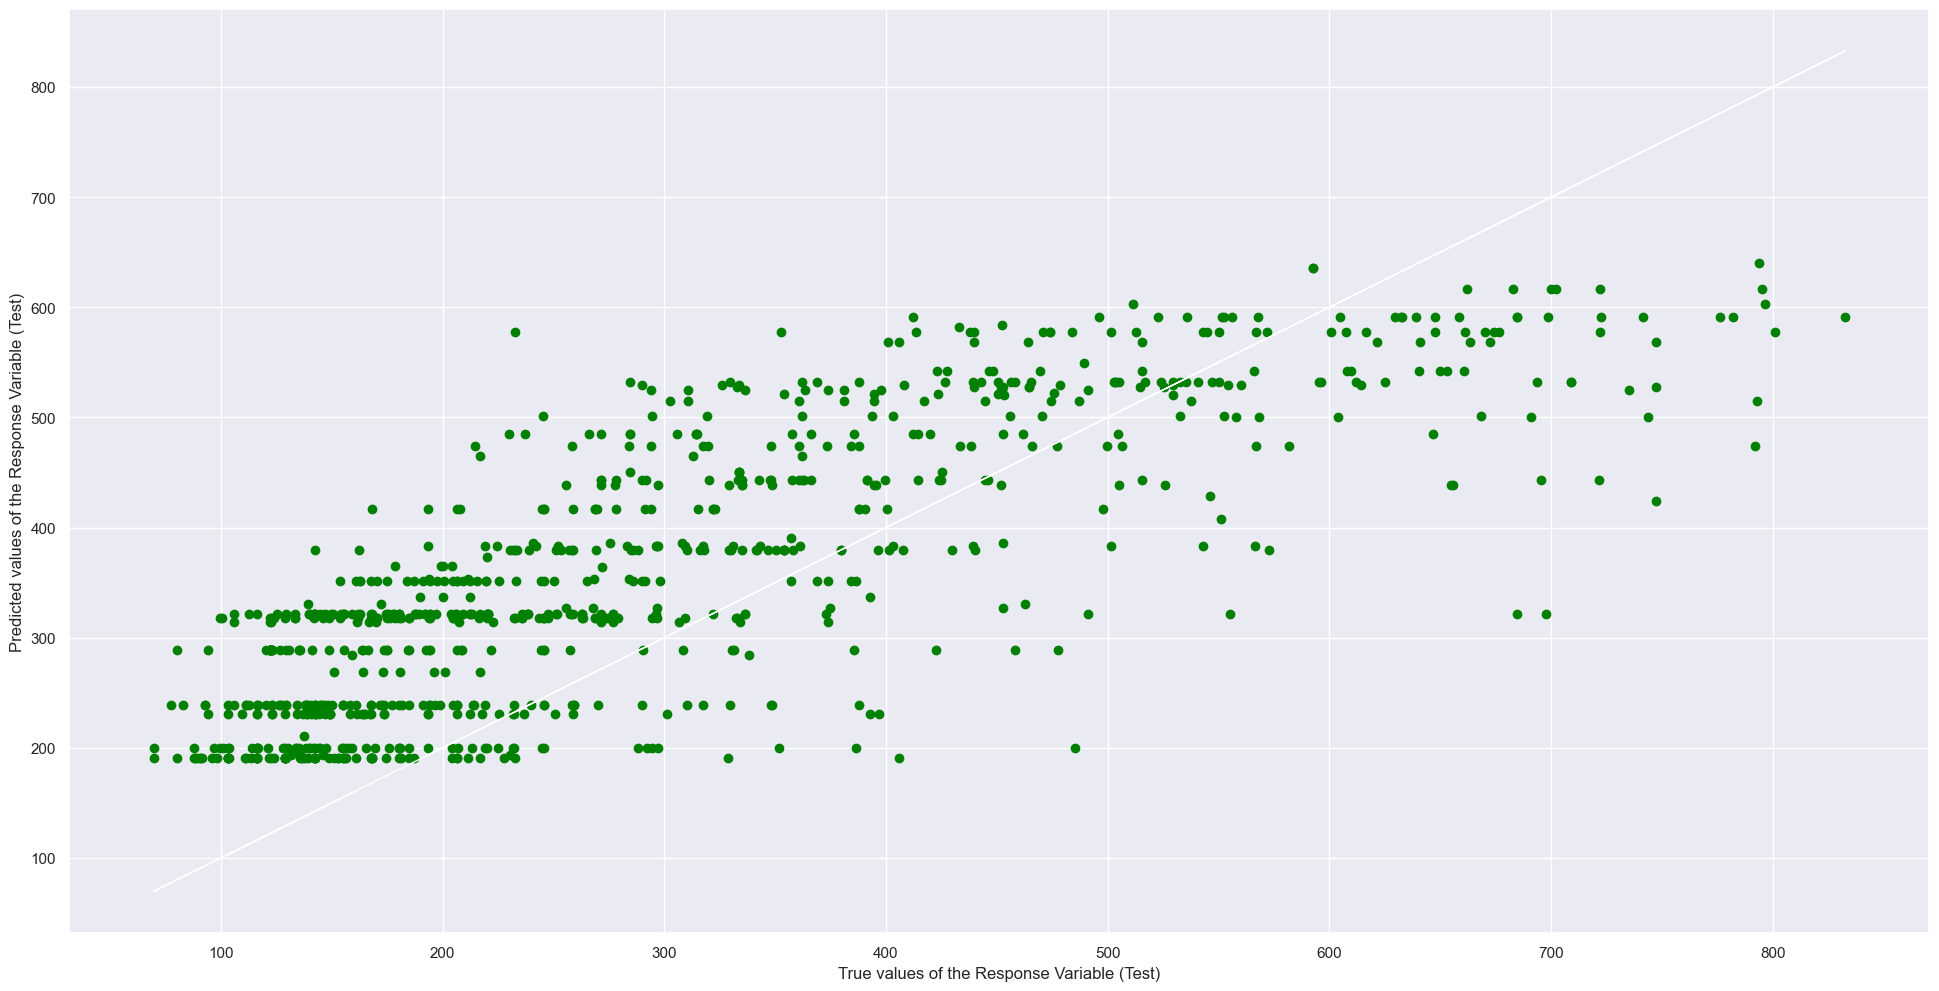

In [5]:
from sklearn.ensemble import AdaBoostRegressor


#To do: Explore tuning parameter for model
model = AdaBoostRegressor()
model.fit(x_train, y_train.values.ravel())

#Prediction using test data set 
y_test_pred = model.predict(x_test)

model_statistics(model, x_test, y_test, y_test_pred)

plot_pred(y_test, y_test_pred)



# Model with default paramter does not work 

Reason: Default model uses DecisionTreeRegressor which is a bad model to predict, the subsequent prediction causes these errors in prediction for the model 

Solution: Use a better starting model for the regression


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6992876868761142
Mean Squared Error (MSE) 	: 8481.821022805581



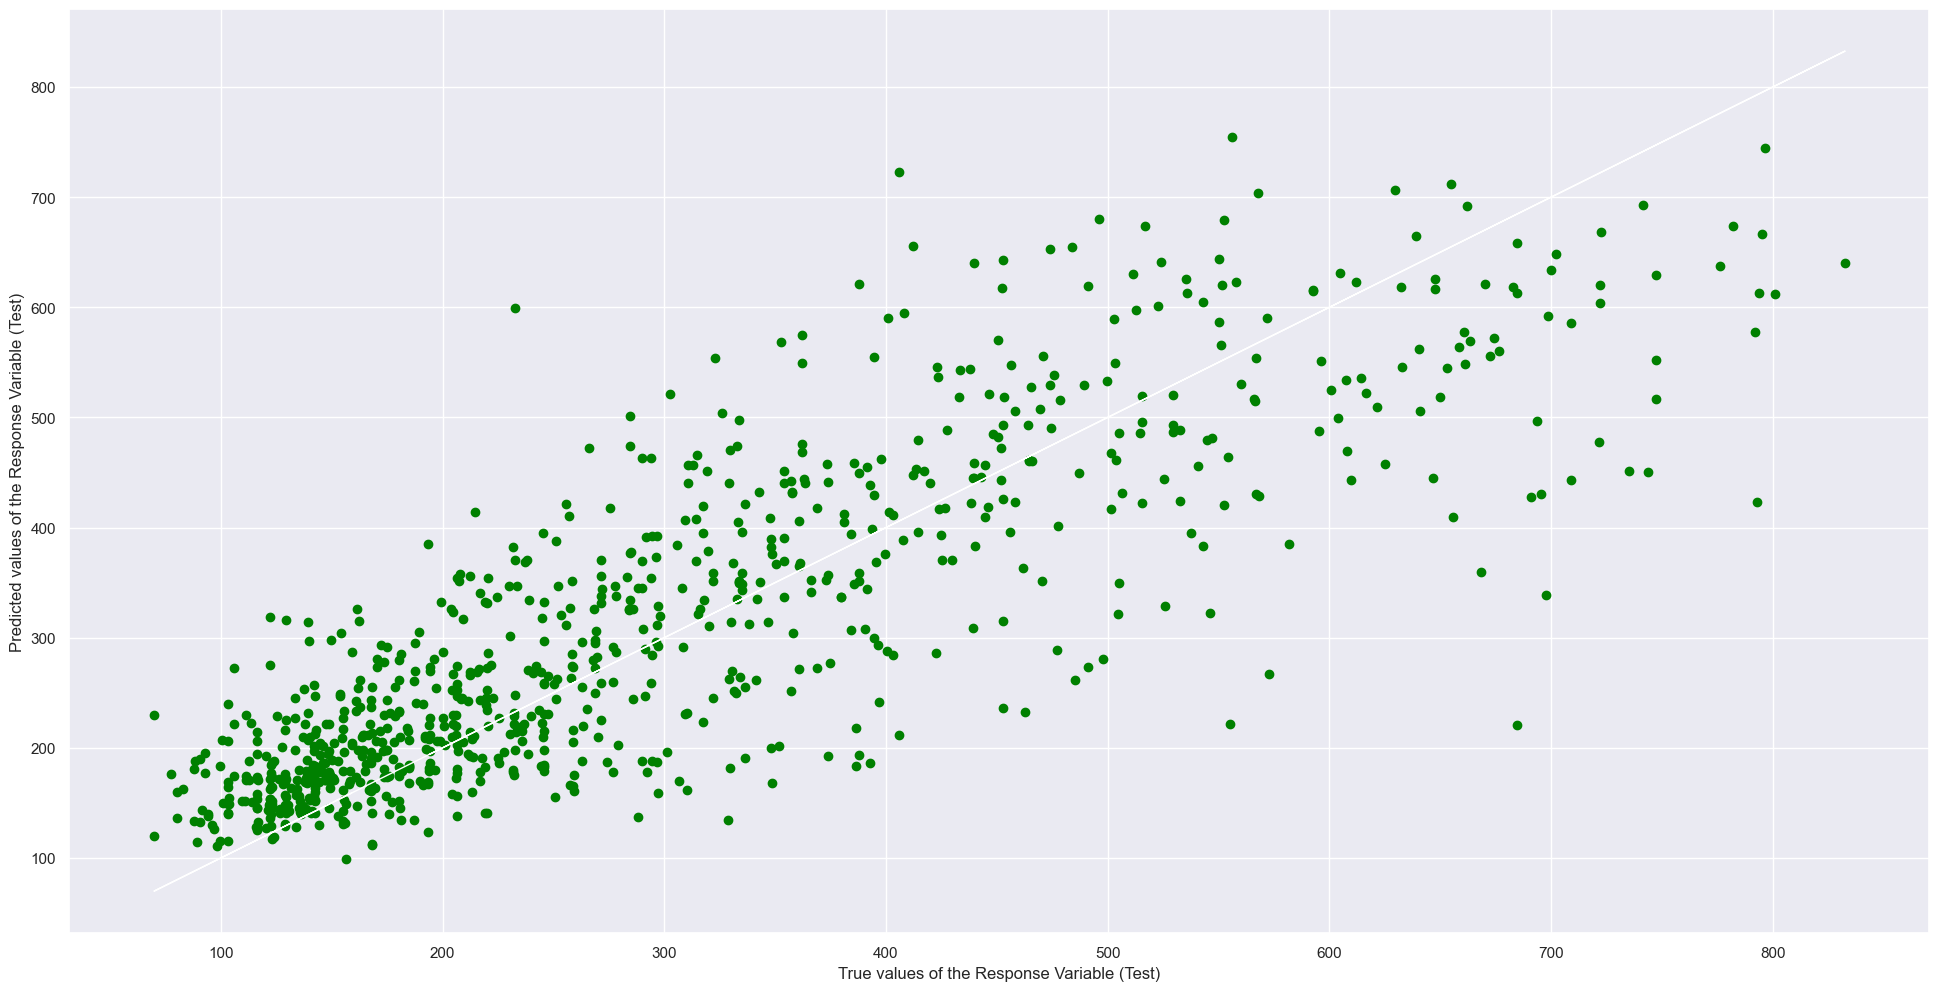

In [6]:
from sklearn.ensemble import RandomForestRegressor

s_model = RandomForestRegressor()
#To do: Explore tuning parameter for model
model = AdaBoostRegressor(estimator=s_model)
model.fit(x_train, y_train.values.ravel())

#Prediction using test data set 
y_test_pred = model.predict(x_test)

model_statistics(model, x_test, y_test, y_test_pred)

plot_pred(y_test, y_test_pred)


# Tuning the hyperparameter of the model

Import GridSearch for hyperparameter tuning using Cross-Validation (CV)